# Solve the heat equation explicitly and with the Euler algorithm

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# Load necessary files
from PDE_Solver.solver import explicit_euler, euler_parameters
from PDE_Solver.utils import plot_solution

# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm
import pandas as pd

## Define functions to apply the Euler method and calculate the analytic solution

In [59]:
def apply_euler_algorithm(parameters):
    # Calculate step in x direction
    parameters.num_x_steps = int(1 / parameters.dx)
    
    # Calculate dt
    parameters.dt = round(0.5 * (parameters.dx ** 2) * 0.5,6)
    parameters.num_time_steps = int((parameters.t_end - parameters.t_start) / parameters.dt)

    # Initialize output array
    u_euler = explicit_euler.initialize_output(parameters)    
    
    # Create grid
    x, t = explicit_euler.create_grid(parameters)
    
    # Apply initial conditions
    u_euler = explicit_euler.define_initial_conditions(u_euler)
    # Apply boundary conditions
    u_euler = explicit_euler.define_boundary_conditions(u_euler, x)
    # Perform Euler algorithm
    u_euler = explicit_euler.perform_euler_algorithm(u_euler, parameters)
    
    return parameters, x, t, u_euler

In [60]:
def calculate_analytic_solution(parameters):
    # Initialize output array
    u_analytic = explicit_euler.initialize_output(parameters)
    
    # Create grid
    x, t = explicit_euler.create_grid(parameters)
    
    # Calculate solution
    u_analytic = explicit_euler.explicit_solution(u_analytic, x, t, parameters)
    
    return x, t, u_analytic

## Analysis of solution for fixed $\Delta x$

To analyse the performance of the Euler method we use it to solve the heat equation with $\Delta x = 0.01 [m]$ and $\Delta x = 0.1 [m]$. Note that $\Delta t$ is chosen such that  $\Delta t = \frac{1}{4} \Delta x ^2$ to ensure stability.

In [61]:
# Set dx to 1 cm
params_0_01 = euler_parameters.Parameters()
params_0_01.dx = 1/100

# EULER SOLUTION
params_0_01, x_0_01_dx, t_0_01_dx, u_euler_0_01_dx = apply_euler_algorithm(params_0_01)

# ANALYTIC SOLUTION
_, _, u_analytic_0_01_dx = calculate_analytic_solution(params_0_01)

print(params_0_01)

Parameters(dx=0.01, x_start=0.0, L=1, x_end=1, num_x_steps=100, dt=2.5e-05, t_start=0.0, t_end=1.0, num_time_steps=40000)


In [62]:
# Set dx to 10 cm
params_0_1 = euler_parameters.Parameters()
params_0_1.dx = 1/10

# EULER SOLUTION
params, x_0_1_dx, t_0_1_dx, u_euler_0_1_dx = apply_euler_algorithm(params_0_1)

# ANALYTIC SOLUTION
_, _, u_analytic_0_1_dx = calculate_analytic_solution(params_0_1)

print(params_0_1)

Parameters(dx=0.1, x_start=0.0, L=1, x_end=1, num_x_steps=10, dt=0.0025, t_start=0.0, t_end=1.0, num_time_steps=400)


C:\Users\amandink\AppData\Local\Temp\ipykernel_2416\1602060600.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(labels)
C:\Users\amandink\AppData\Local\Temp\ipykernel_2416\1602060600.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(labels)


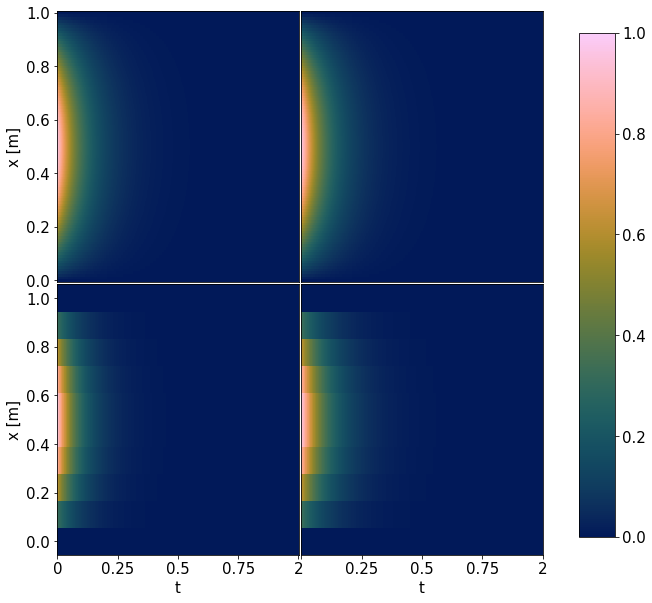

In [63]:
%matplotlib inline

# Plot solutions

plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(2,2, figsize=(10, 10))
fig.subplots_adjust(wspace=0.01, hspace=0.01, right=0.8)

plt_u_euler_1_dx = axs[0,0].pcolor(t_0_01_dx, x_0_01_dx, u_euler_0_01_dx, shading='auto', vmin=0.0, vmax=1.0, cmap=cm.batlow)
axs[0,0].set_ylabel('x [m]')
axs[0,0].set_xticks([])

plt_u_explicit_1_dx = axs[0,1].pcolor(t_0_01_dx, x_0_01_dx, u_analytic_0_01_dx, shading='auto', vmin=0.0, vmax=1.0, cmap=cm.batlow)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

plt_u_euler_10_dx = axs[1,0].pcolor(t_0_1_dx, x_0_1_dx, u_euler_0_1_dx, shading='auto', vmin=0.0, vmax=1.0, cmap=cm.batlow)
axs[1,0].set_xlabel('t')
labels = axs[1,0].get_xticks().tolist()
labels[1] = '0'
labels[5] = '2'
axs[1,0].set_xticklabels(labels)
axs[1,0].set_ylabel('x [m]')

plt_u_explicit_10_dx = axs[1,1].pcolor(t_0_1_dx, x_0_1_dx, u_analytic_0_1_dx, shading='auto', vmin=0.0, vmax=1.0, cmap=cm.batlow)
axs[1,1].set_xlabel('t')
labels[1] = ''
axs[1,1].set_xticklabels(labels)
axs[1,1].set_yticks([])

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt_u_explicit_10_dx, cax=cbar_ax)

#fig.savefig('images\euler_analytic_solution.png', bbox_inches='tight')

In [64]:
# Calculate errors
error_0_01_dx = abs(u_analytic_0_01_dx - u_euler_0_01_dx)
error_0_1_dx = abs(u_analytic_0_1_dx - u_euler_0_1_dx)

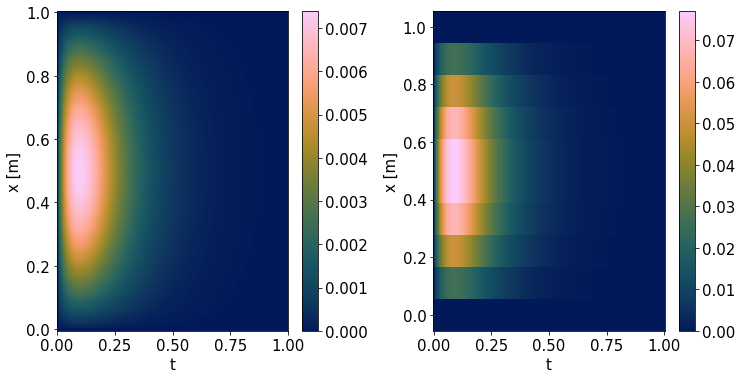

In [65]:
%matplotlib inline

# Plot errors

plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(1,2, figsize=(10, 5))
fig.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)

plt_error_1_dx = axs[0].pcolor(t_0_01_dx, x_0_01_dx, error_0_01_dx, shading='auto', cmap=cm.batlow)
axs[0].set_xlabel('t')
axs[0].set_ylabel('x [m]')
fig.colorbar(plt_error_1_dx, ax=axs[0])
#axs[0].set_title('ERROR, dx = 1cm')

plt_error_10_dx = axs[1].pcolor(t_0_1_dx, x_0_1_dx, error_0_1_dx, shading='auto', cmap=cm.batlow)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x [m]')
fig.colorbar(plt_error_10_dx, ax=axs[1])
#axs[1].set_title('ERROR, dx = 10cm')

#fig.savefig('images\euler_analytic_abs_error.png', bbox_inches='tight', cmap=cm.batlow)

## Study solution for different t

C:\Users\amandink\Anaconda3\envs\compsci_project_2_3_9\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


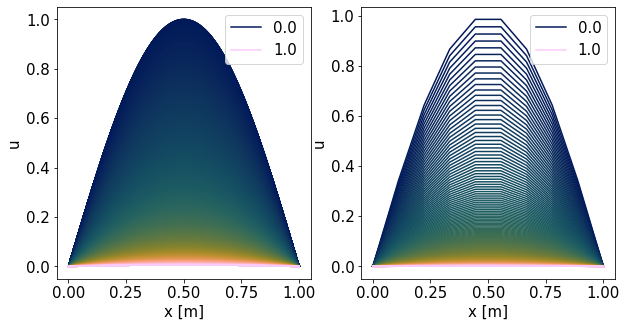

In [66]:
%matplotlib inline

plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(1,2, figsize=(10,5))

colors_0_01 = iter(cm.batlow(np.linspace(0, 1, len(t_0_01_dx[::2]))))
colors_0_1 = iter(cm.batlow(np.linspace(0, 1, len(t_0_1_dx[::2]))))

for index, t in enumerate(t_0_01_dx[::2]):
    if index==0 or index==len(t_0_01_dx[::2])-1:
        axs[0].plot(x_0_01_dx, u_euler_0_01_dx[:, index], label=np.round(t,2), color=next(colors_0_01))
    else:
        axs[0].plot(x_0_01_dx, u_euler_0_01_dx[:, index], color=next(colors_0_01))

for index, t in enumerate(t_0_1_dx[::2]):
    if index==0 or index==len(t_0_1_dx[::2])-1:
        axs[1].plot(x_0_1_dx, u_euler_0_1_dx[:, index], label=np.round(t,2), color=next(colors_0_1))
    else:
        axs[1].plot(x_0_1_dx, u_euler_0_1_dx[:, index], color=next(colors_0_1))
    
axs[0].set_xlabel('x [m]')
axs[0].set_ylabel('u')
axs[0].legend()

axs[1].set_xlabel('x [m]')
axs[1].set_ylabel('u')
axs[1].legend()

#fig.savefig('images\euler_analytic_several_t.png', bbox_inches='tight')

## Study maximal error over $\Delta x$

In [67]:
delta_x = np.round(np.arange(0.0, 1.01, 1/100), 3)

max_error = np.empty([1, len(delta_x)-1])
max_error[:] = np.nan
mean_error = np.empty([1, len(delta_x)-1])
mean_error[:] = np.nan
median_error = np.empty([1, len(delta_x)-1])
median_error[:] = np.nan

for index, dx in enumerate(delta_x[1:]):
    params = euler_parameters.Parameters()
    params.dx = dx
    
    params, x, t, u_euler_temp = apply_euler_algorithm(params)

    u_analytic_temp = explicit_euler.initialize_output(params)
    u_analytic_temp = explicit_euler.explicit_solution(u_analytic_temp, x, t, params)

    max_error[0, index] = np.nanmax(abs(u_euler_temp-u_analytic_temp))
    mean_error[0, index] = np.nanmean(abs(u_euler_temp-u_analytic_temp))
    median_error[0, index] = np.nanmedian(abs(u_euler_temp-u_analytic_temp))
    
max_error = max_error.flatten()
mean_error = mean_error.flatten()
median_error = median_error.flatten()

In [68]:
print(delta_x)
print('--------')
print(mean_error)
print('--------')
print(median_error)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
--------
[1.27104397e-03 2.50527393e-03 4.90122601e-03 4.86186156e-03
 5.98346649e-03 1.14748236e-02 1.02705596e-02 1.33061161e-02
 1.10439841e-02 1.10077737e-02 1.27992350e-02 1.63518307e-02
 2.12007821e-02 1.60546684e-02 2.27904167e-02 1.88645177e-02
 2.64439851e-02 2.37059452e-02 2.07296705e-02 1.79143528e-02
 2.65888256e-02 2.49075672e-02 2.31431790e-02 2.13469001e-02
 1.95936849e-02 2.48052172e-02 2.39832057e-02 2.34134695e-02
 2.25420165e-02 2.17857636e-02 2.09203525e-02 2.02

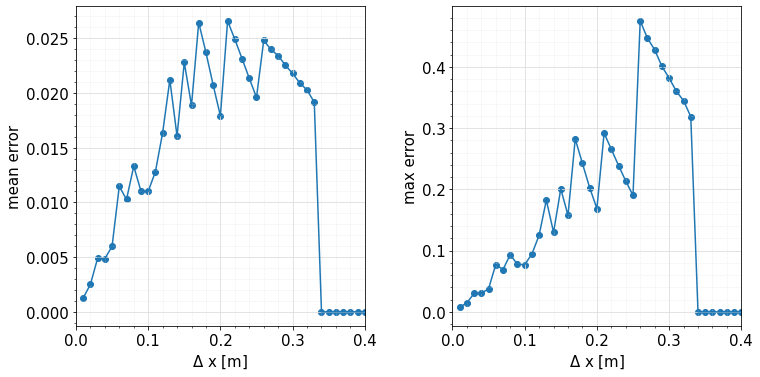

In [69]:
%matplotlib inline
plt.rc('font', **{'size':'15'})
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=0.4, w_pad=3, h_pad=3.0)

axs[0].plot(delta_x[1:], mean_error)
axs[0].scatter(delta_x[1:], mean_error)
axs[0].set_xlabel(r'$\Delta$ x [m]')
axs[0].set_xlim(0, 0.4)
axs[0].set_ylabel('mean error')
axs[0].grid(which='major', color='#DDDDDD', linewidth=0.8)
axs[0].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
axs[0].minorticks_on()

axs[1].plot(delta_x[1:], max_error)
axs[1].scatter(delta_x[1:], max_error)
axs[1].set_xlabel(r'$\Delta$ x [m]')
axs[1].set_xlim(0, 0.4)
axs[1].set_ylabel('max error')
axs[1].grid(which='major', color='#DDDDDD', linewidth=0.8)
axs[1].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.5)
axs[1].minorticks_on()

#fig.savefig('images\mean_median_error_over_delta_x.png', bbox_inches='tight')